# Linear Regression in numpy

This notebook gives an intro to machine learning from scratch using numpy and also covers feature scaling and the gradient descent algorithm.

## What is linear regression?

Linear = our predictions are a **linear combination** of our inputs

Regression = we will learn the relationship that relates features to labels

$X$ is a matrix of training data. Each row represents a different training example (of which there are $m$). Each column represents a different feature (of which there are $n$). Hence $X$ has dimensions $m \times n$, i.e. $X \in  R^{m \times n}$.

$W$ is our matrix of weights, that controls how much each feature contributes to the hypothesis. If one particular weight equals 5, then changing its associated feature by 1 in the input space, will change the output hypothesis by 5. $W \in R^{n \times 1}$

$h$ is our hypothesis - our prediction of the mapping from input to output. In this example, our model will predict a single scalar output for each of out $m$ inputs - so $h \in R^{m\times n}$.

## $ h = X W = w_1 x_1 + w_2 x_2 + \dots + w_{n-1} x_{n-1} + w_n x_n$

This linear combination is a **weighted sum of the input features**. As we vary the value of one feature, our hypothesis will change proportionately and linearly.

Imagine that we are trying to predict house price. Consider:
- The weight associated with the feature that is the number of rooms should be large and positive, because the number of rooms contributes lots, and positively to the price of a house. 
- The weight associated with the age of the house may be negative, as older houses might be found to be worth less from the training data.
- The weight associated with a feature that is the age of the person last living there should be zero, because the house price is independent of this feature. It does not contribute at all to the house price.

## Cost functions

For our algorithms to learn, we need a way to evaluate their current performance, so that we can determine how to improve. We can mathematically define when our algorithm is performing well by evaluating an appropriate objective function. We usually try to minimise a function which indicates the error in our hypothesis. In this case, we will use the mean squared error (MSE) between our predictions and labels as our cost function.

## $ MSE\ Loss,\ J = \frac{1}{2m} \sum_{i=1}^{m} (h - y)^2$

The cost function has as many dimensions as we have parameters. Changing these parameters moves us around parameter space, in which the cost varies. Varying different parameters will have varying influence on how the cost changes - as such, some are more important to optimise.

(See cost functions notebook for more detail)

## Gradient Descent
Gradient descent works by moving the weights that control a model in a direction that most decreases the cost. What is this direction? The gradient of a function at a point is a vector pointing in the direction which it increases fastest locally. So the direction which most *decreases* the cost function, is the negative gradient - in this case, it will be an $n+1$ (features and bias) dimensional vector.

The negative gradient tells us the correct direction to move each weight in, but not the ideal size of the step.
If we move the parameters by the value of the negative gradient, there is a chance that they may jump straight over the minima, perhaps to a point where the gradient is even higher! This can happen because the gradient can be greater than the distance of the parameter from its optimal position. This causes divergence, of the model parameters, instead of convergence. 
So, in gradient descent, we iteratively update the weights *proportionally* to the negative gradient at their local position. This proportionality constant, which the gradient is multiplied by to get the step size, is called the **learning rate**.

At a minima, the gradient will be zero and the parameter should stabilise.

### Pseudo code for SGD
#### Randomly select a batch of datapoints from the training set to train on.
#### Make a prediction of the output for those 
#### Evaluate the model's cost for these predictions
#### Find rate of change of cost wrt model parameters
#### Update the model parameters proportionately to the negative gradients found above, according to:

### $ \theta\  \dot{=}\  \theta - \alpha \frac{\partial J}{\partial \theta}$

#### Repeat for defined number of epochs

## The code
Firstly we will import some functionality

In [18]:
import numpy as np                      # for mathematical computation
import matplotlib.pyplot as plt         # for plotting

### Making Data
Let's write a function and call it to create some fake data that we know the function of

In [19]:
m = 100 # specify the number of datapoints that we want

def makedata(numdatapoints):            # make some fake data fitted to an arbitrary polynomial
    """Make some fake data noisily distributed around a polynomial"""
    x = np.linspace(-10, 10, numdatapoints)     # create a vector of numdatapoints(=m) numbers evenly spaced between -10 and 10
    x = x.reshape(-1, 1)    # make it into a column vector (each datapoint is a row)

    coeffs = [2, -30, 0.5, 5]   # make some polynomial coefficients for the fake data

    y = np.polyval(coeffs, x) + 2 * np.random.rand(numdatapoints, 1)    # evaluate a polynomial with the coefficients we
                                                                        # specified to create the labels for our data
    y = y.reshape(-1, 1) # reshape into column vector (each datapoint is a row)

    return x, y # return column vectors of single inputs and outputs

### Features
Our made up datapoints are only one-dimensional. Using only these features, we will only be able to form linear combinations of these values - no polynomial characteristic in our hypothesis.
So we may choose to give the model a particular set of features based upon how we expect the mapping to look, or just to increase the capacity of our model. For example, house price is probably dependent on floor space, so we might include a power of 2 if our original variable was room length.

Let's manually **make some polynomial features** from our data

In [20]:
powers = [2, 3]     # a list of the powers of the inputs which we want to include as features for our model
n = len(powers)     # n = number of features of each training datapoint

def makefeatures(powers):
    features = np.ones((inputs.shape[0], len(powers)))  # initialise a design matrix with the right shape (mxn)
    for i in range(len(powers)):    # for each power in the list powers
        features[:, i] = (inputs**powers[i])[:, 0] # set a column of the design matrix = inputs raised to that power
    print(features)

    return features

### Feature Scaling - normalisation/standardisation

If the scale of variables is different, it is likely that one of the variables will start further from an acceptably sufficient position than another. When the first one of them reaches a sufficient value, it needs to stop jumping around and settle, however, any other variables need to keep moving and being optimised. 
If variables vary over the same domain, but have ranges of different scales
The learning rate needs to be small enough to ensure that the parameters converge, but large enough to ensure that this happens at a suitable rate.
 

In [21]:
def scale_features(features):   # center all features around their mean and divide by their range

    avg = np.mean(features, axis=0) # calculate the mean of each of our features over the whole dataset
    print(avg)
    ranges = np.ptp(features, axis=0)   #  calculate the peak-to-peak values for each feature (ptp of the rows)

    scaled = features - avg     # center all features about their mean
    scaled = np.divide(scaled, ranges)  # divide features by their range so that they are all between 0 and 1
    print(scaled)

    return scaled, avg, ranges  # return our scaled features and the averages and ranges of each feature

Let's build our model class

In [22]:
epochs = 100    # number of times we want to pass through the whole dataset when training
lr = 0.5    # proportion of the gradient by which we want to move our parameters each optimisation step
batch_size=32   # number of data points to train on each optimisation step

class LinearModel():    # create a class as a framework for our linear model

    def __init__(self): # class initialiser
        self.weights = np.random.rand(n, 1)     # randomly initialise a nx1 (in x out) matrix of weights
        print(self.weights)
        self.bias = np.random.rand(1) # initialise a random initial bias (offset)
        print(self.bias)

    def forward(self, x):   # define what happens when data is passed forward through our model
        out = np.matmul(x, self.weights) + self.bias # output is the biased, linear combination of our inputs
        return out

Now define our criterion - the mean squared error

In [23]:
def MSE(h, y):  # mean squared error loss as our model criterion
    diff = h - y    # vector of raw differences between prediction hypothesis and labels
    J = 0.5 * np.matmul(diff.T, diff) # cost = 0.5 diff^2
    return float(J) # return the cost as a float rather than a 1x1 matrix


And define our optimiser

In [24]:
def SGD(datain, batch_size):    # stochastic gradient descent
    sample = np.random.randint(m, size=batch_size)  # create a list of batch_size=32 random indices to include in the
                                                    # training batch

    batchfeatures, batchlabels = datain[sample], labels[sample] # index the randomly selected batch from the training data

    prediction = mymodel.forward(batchfeatures) # make a prediction for the training batch using the current parameters
    cost = MSE(prediction, batchlabels) # determine how bad the model performs on this batch by calculating the mena square error

    dJdw = np.matmul(batchfeatures.T, (prediction - batchlabels))/m # rate of change of cost wrt weights
    mymodel.weights -= lr * dJdw    # move the weights a small step in the right direction

    dJdb = np.sum(prediction - batchlabels)/m # rate of change of cost wrt bias
    mymodel.bias -= lr * dJdb# move the bias a small step in the right direction

    return cost # return how bad the model is

Let's write a function to train our model

In [34]:
def train(datain):
    costs=[]    # initialise an empty list of costs for visualisation
    for e in range(epochs): # for however many epochs specialises

        print('b', mymodel.bias[0]) # print bias
        print('w', mymodel.weights) # print weights

        cost = SGD(datain, batch_size)  # calculate cost for a specified batch size
        costs.append(cost) # add cost to list of history
        print('Epoch', e, 'Cost', cost)
        
    return costs # return a list of the history of costs

Now let's use the functions that we made above to create the data, create features from it, and scale those.

In [35]:
inputs, labels = makedata(m) # call the above function to make the data
features = makefeatures(powers) # make our features with the powers we specified
scaled, avgs, ranges = scale_features(features)     # scale our features (try and see what happens when you don't scale)
print(avgs, ranges) # show us mean and ranges for each feature

[[  1.00000000e+02  -1.00000000e+03]
 [  9.60004081e+01  -9.40610059e+02]
 [  9.20824406e+01  -8.83619379e+02]
 [  8.82460973e+01  -8.28978490e+02]
 [  8.44913784e+01  -7.76637923e+02]
 [  8.08182838e+01  -7.26548208e+02]
 [  7.72268136e+01  -6.78659877e+02]
 [  7.37169677e+01  -6.32923460e+02]
 [  7.02887460e+01  -5.89289487e+02]
 [  6.69421488e+01  -5.47708490e+02]
 [  6.36771758e+01  -5.08130999e+02]
 [  6.04938272e+01  -4.70507545e+02]
 [  5.73921028e+01  -4.34788658e+02]
 [  5.43720029e+01  -4.00924870e+02]
 [  5.14335272e+01  -3.68866710e+02]
 [  4.85766758e+01  -3.38564710e+02]
 [  4.58014488e+01  -3.09969401e+02]
 [  4.31078461e+01  -2.83031313e+02]
 [  4.04958678e+01  -2.57700977e+02]
 [  3.79655137e+01  -2.33928923e+02]
 [  3.55167840e+01  -2.11665682e+02]
 [  3.31496786e+01  -1.90861786e+02]
 [  3.08641975e+01  -1.71467764e+02]
 [  2.86603408e+01  -1.53434148e+02]
 [  2.65381084e+01  -1.36711467e+02]
 [  2.44975003e+01  -1.21250254e+02]
 [  2.25385165e+01  -1.07001038e+02]
 

Make our model and and train it on the data

In [36]:
mymodel = LinearModel() # create an instance of a linear model

datain = scaled # set the data going in to our model as our scaled data (not necessary really)

costs = train(datain)     # finally, call the function to train our model

[[ 0.22766182]
 [ 0.26402366]]
[ 0.77729049]
b 0.777290491039
w [[ 0.22766182]
 [ 0.26402366]]
Epoch 0 Cost 30300113.44326989
b -133.588759579
w [[-32.64166191]
 [ 17.21959744]]
Epoch 1 Cost 57486546.67178522
b -330.059833789
w [[-99.69560594]
 [ 68.00073134]]
Epoch 2 Cost 37719638.98053326
b -464.902219203
w [[-152.93152997]
 [ 101.088429  ]]
Epoch 3 Cost 23677586.850044593
b -546.257505931
w [[-188.925881  ]
 [ 123.97233249]]
Epoch 4 Cost 37213027.44055974
b -636.514848551
w [[-250.78189245]
 [ 164.1083518 ]]
Epoch 5 Cost 32668674.520104457
b -721.256145381
w [[-308.18982585]
 [ 199.66745346]]
Epoch 6 Cost 15529444.587085538
b -755.660712899
w [[-338.08903965]
 [ 216.62922109]]
Epoch 7 Cost 7450389.214398697
b -735.593283958
w [[-359.95417205]
 [ 222.27930496]]
Epoch 8 Cost 21759928.341232207
b -778.145168829
w [[-401.64695593]
 [ 247.50984571]]
Epoch 9 Cost 8884360.984087048
b -790.088088965
w [[-421.16724469]
 [ 256.87351138]]
Epoch 10 Cost 29244012.388661742
b -858.221508717
w [[-

Now lets create some plots to visualise how the model trained

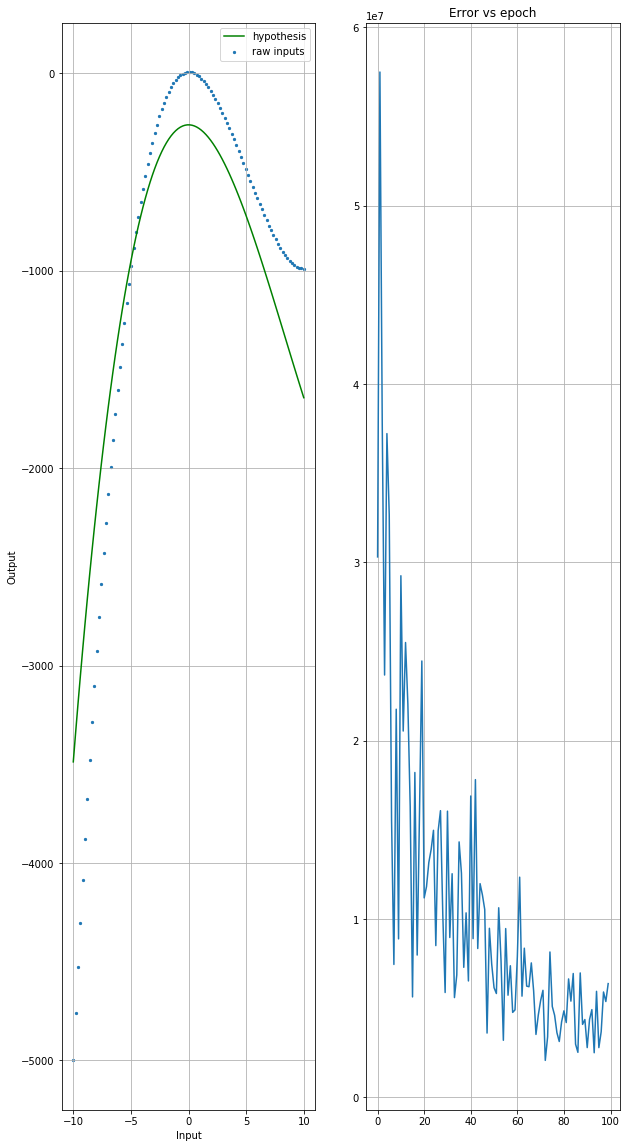

In [38]:
fig = plt.figure(figsize=(10, 20))  # create a figure

ax1 = fig.add_subplot(121)  # add an axis called ax1 to our figure (height=1, width=2, axis number=1)
ax1.set_xlabel('Input')
ax1.set_ylabel('Output')
ax1.scatter(inputs, labels, s=5, label='raw inputs')    # scatter plot our labels against our inputs with size=5 markers
ax1.plot(inputs, mymodel.forward(datain), c='g',label='hypothesis')  # plot hypothesis against inputs
ax1.grid()  # add a grid to our axis
ax1.legend()

ax2 = fig.add_subplot(122)     # add another axis called ax2 to our figure (height=1, width=2, axis number=2)
ax2.set_title('Error vs epoch')
ax2.grid()


ax2.plot(costs)

plt.show()  # show the plots

Play around with the no. epochs, the learning rate, the batch size etc. When does it fail to converge? What is the necessary capacity of the model required to form a decent looking hypothesis?